IMPORT LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

MOUNT DRIVE

In [2]:
drive.mount('/content/drive/')
path = '/content/drive/My Drive/Colab Notebooks/ESC597/Tree-based methods/'

Mounted at /content/drive/


LOAD DATA


Total time taken loading data (in seconds): 2.53


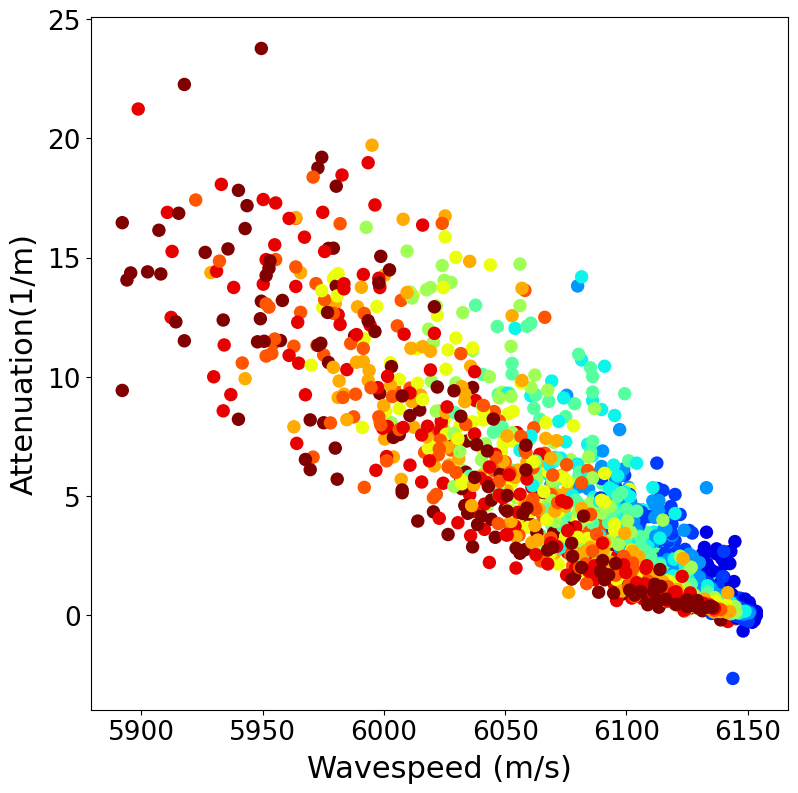

In [3]:
time_start = time.time()

xdf = np.loadtxt('{}data.txt'.format(path)) #Time signals usesd as input to the ML
ydf = np.loadtxt('{}info.txt'.format(path)) #Category Label vector

ydf = ydf[:, 0]

plt.figure(figsize = (9, 9))
plt.scatter(xdf[:,0], xdf[:,1], c = ydf, s = 75, cmap='jet')
plt.tick_params(axis='x', which='major', labelsize=19)
plt.tick_params(axis='y', which='major', labelsize=19)
plt.xlabel('Wavespeed (m/s)', labelpad = 6, fontsize = 22)
plt.ylabel('Attenuation(1/m)', labelpad = 6, fontsize = 22)
plt.savefig('data.jpg', bbox_inches = 'tight', dpi = 400)


time_taken = time.time() - time_start
print('\nTotal time taken loading data (in seconds): {:.2f}'.format(time_taken))

CREATE TRAIN AND TEST DATASETS

In [4]:
seed = 1234 #Define random seed for the shuffling of data
test_size = 0.2 #Define the percentage of testing data

X_train, X_test, y_train, y_test = train_test_split(xdf, ydf, test_size= test_size, random_state = seed, shuffle=True)

print("X_train Size:" + str(X_train.shape))
print("X_test Size:" + str(X_test.shape))

print("y_train Size:" + str(y_train.shape))
print("y_test Size:" + str(y_test.shape))

X_train Size:(1596, 2)
X_test Size:(400, 2)
y_train Size:(1596,)
y_test Size:(400,)


SCALE THE DATA

In [5]:
scaler = MinMaxScaler((-1, 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scaler = MinMaxScaler((0, 1))

y_train = scaler.fit_transform(y_train.reshape(-1,1))
y_test = scaler.transform(y_test.reshape(-1,1))

DEFINE RANGES OF THE PARAMETERS TO PERFORM GRIDSEARCH FOR

In [6]:
# n_estimators: The number of trees/estimators to use.
# max_depth: The maximum depth of each tree / How much can the tree expand.
# learning_rate: value of The learning rate to be used for gradient descent during training
# subsample: Fraction of training data to choose from to form the input for each tree.
# colsample_bytree: Fraction of features to choose from to use for the regression rules in each tree.
# min_child_weight: The minimum sum of instance weight (hessian) needed in a node to split it.

model_params = {"n_estimators": [53, 103, 203, 503, 703],
                "max_depth": [2, 5, 10, 15],
                "learning_rate": [1e-2,],
                "subsample": [0.3,],
                "colsample_bytree":[1.0,],
                "min_child_weight": [1.2,],
               }

INITIALIZE THE MODEL ΤΟ PERFORM THE GRID SEARCH OVER THE DEFINED RANGES OF THE DESIRED PARAMETERS

In [7]:
n_Kfolds = 5 # number of K-folds to consider fro cross-validation
model_GridSearch = XGBRegressor(random_state = seed,verbosity=2)
model_GridSearch = GridSearchCV(model_GridSearch, model_params, cv = n_Kfolds,verbose=1, scoring = "neg_mean_squared_error")
print(model_GridSearch)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=1

FIT THE MODEL

In [8]:
time_start = time.time()

model_GridSearch.fit(X_train, y_train) 

time_taken = time.time() - time_start
print('\nTotal time taken performing Grid Search (in seconds): {:.2f}'.format(time_taken))

Streaming output truncated to the last 5000 lines.
[17:42:12] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 168 extra nodes, 0 pruned nodes, max_depth=11
[17:42:12] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 132 extra nodes, 0 pruned nodes, max_depth=11
[17:42:12] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 170 extra nodes, 0 pruned nodes, max_depth=13
[17:42:12] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 190 extra nodes, 0 pruned nodes, max_depth=12
[17:42:12] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 148 extra nodes, 0 pruned nodes, max_depth=14
[17:42:12] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 164 extra nodes, 0 pruned nodes, max_depth=12
[17:42:12] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 156 extra nodes, 0 pruned nodes, max_depth=13
[17:42:12] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 160 extra nodes, 0 pruned nodes, max_depth=13
[17:42:12] INFO: ../src/tree/updater_

PRINT THE PARAMETERS OF THE BEST MODEL THAT WAS GIVEN FROM GRIDSEARCH

In [9]:
best_estimator = model_GridSearch.best_estimator_ # get the best model
best_score = model_GridSearch.best_score_ # get the score for the best estimator
best_parameters = model_GridSearch.best_params_ # get the parameters for the best estimator

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", best_estimator)
print("\n The best score across ALL searched params:\n", best_score)
print("\n The best parameters across ALL searched params:\n", best_parameters)

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1.2, missing=nan, monotone_constraints=None,
             n_estimators=503, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1234, ...)

 The best score across ALL searched params:
 -0.027666367423914533

 The best parameters across ALL searched params:
 {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'mi

PLOT THE GRIDSEARCH RESULTS

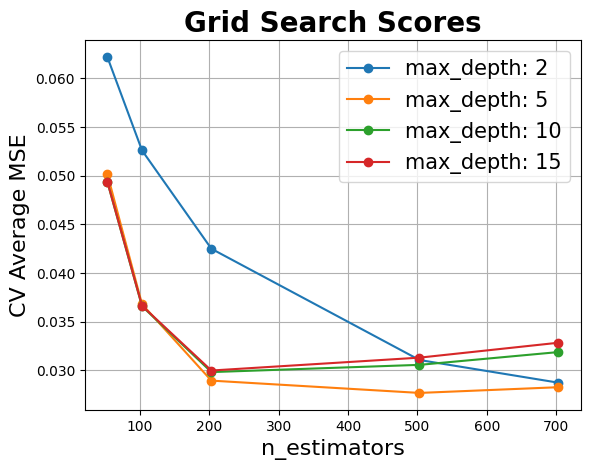

In [16]:
name_param_1 = "n_estimators"
name_param_2 = "max_depth"

grid_param_1 = model_params["n_estimators"]
grid_param_2 = model_params["max_depth"]

scores_mean = -model_GridSearch.cv_results_['mean_test_score']
scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

# Plot Grid search scores
_, ax = plt.subplots(1,1)

# Param1 is the X-axis, Param 2 is represented as a different curve (color line)
for idx, val in enumerate(grid_param_2):
    ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
ax.set_xlabel(name_param_1, fontsize=16)
ax.set_ylabel('CV Average MSE', fontsize=16)
ax.legend(loc="best", fontsize=15)
ax.grid('on')

plt.savefig("convergence")

INITIALIZE AND FIT THE MODEL WITH THE BEST PARAMETERS

In [11]:
time_start = time.time()

model = XGBRegressor(**best_parameters)

#model = XGBRegressor(booster = , colsample_bytree = , learning_rate = , max_depth = , min_child_weight = , n_estimators = , random_state = seed,verbose=1)

model.fit(X_train, y_train, eval_set=[(X_train, y_train)], verbose=True)#, eval_metric = 'rmse', early_stopping_rounds=3, verbose=True) 

time_taken = time.time() - time_start
print('\nTotal time taken fitting the model (in seconds): {:.2f}'.format(time_taken))

[0]	validation_0-rmse:0.28880
[1]	validation_0-rmse:0.28725
[2]	validation_0-rmse:0.28552
[3]	validation_0-rmse:0.28376
[4]	validation_0-rmse:0.28218
[5]	validation_0-rmse:0.28046
[6]	validation_0-rmse:0.27881
[7]	validation_0-rmse:0.27739
[8]	validation_0-rmse:0.27569
[9]	validation_0-rmse:0.27408
[10]	validation_0-rmse:0.27261
[11]	validation_0-rmse:0.27092
[12]	validation_0-rmse:0.26932
[13]	validation_0-rmse:0.26774
[14]	validation_0-rmse:0.26615
[15]	validation_0-rmse:0.26455
[16]	validation_0-rmse:0.26299
[17]	validation_0-rmse:0.26158
[18]	validation_0-rmse:0.26008
[19]	validation_0-rmse:0.25866
[20]	validation_0-rmse:0.25718
[21]	validation_0-rmse:0.25576
[22]	validation_0-rmse:0.25430
[23]	validation_0-rmse:0.25297
[24]	validation_0-rmse:0.25169
[25]	validation_0-rmse:0.25032
[26]	validation_0-rmse:0.24914
[27]	validation_0-rmse:0.24791
[28]	validation_0-rmse:0.24669
[29]	validation_0-rmse:0.24547
[30]	validation_0-rmse:0.24419
[31]	validation_0-rmse:0.24287
[32]	validation_0-

PRINT THE OPTIMAL NUMBER OF TREES

In [12]:
number = model.best_ntree_limit
print(number)

503


PLOT MODEL'S CONVERGENCE WITH INCREASING NUMBER OF TREES

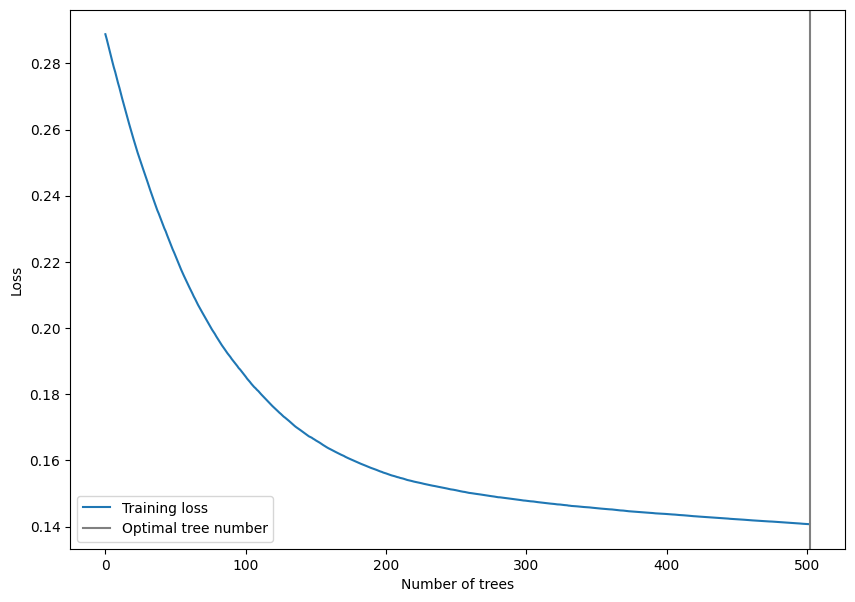

In [13]:
results = model.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.axvline(number-1, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

CALCULATE TRAINING AND TESTING RMSE VALUES

In [14]:
# Training
predictions_train = model.predict(X_train)
RMSE_train = np.sqrt(mean_squared_error(y_train, predictions_train))
print("RMSE scores: Train - %0.2f" %(RMSE_train))

# Testing
predictions_test = model.predict(X_test)
RMSE_test = np.sqrt(mean_squared_error(y_test, predictions_test))
print("RMSE scores: Testing - %0.2f" %(RMSE_test))

RMSE scores: Train - 0.14
RMSE scores: Testing - 0.17


CALCULATE TRAINING AND TESTING R2-SCORE VALUES

R2 scores: Train - 0.76
R2 scores: Testing - 0.67


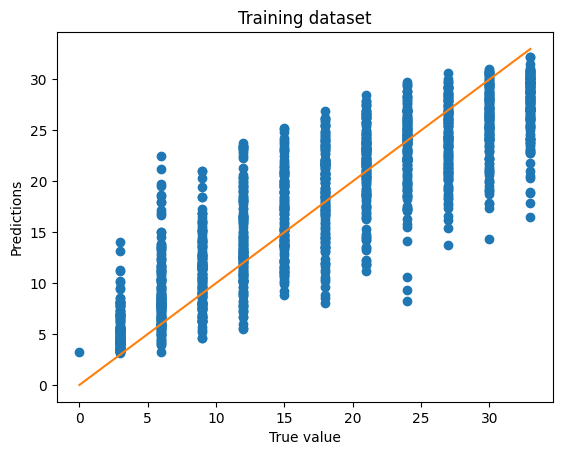

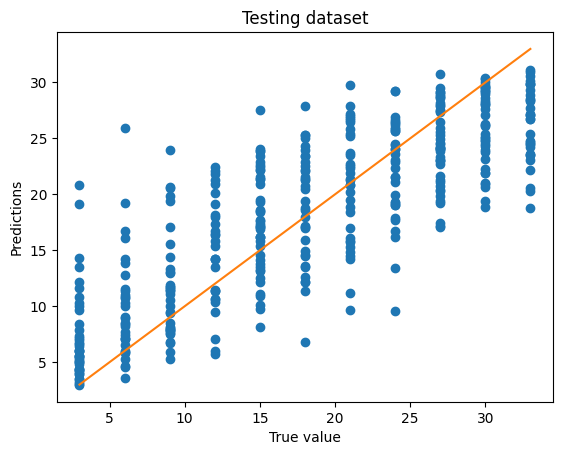

In [15]:
# Training
r2_train = r2_score(y_train, predictions_train)
print("R2 scores: Train - %0.2f" %(r2_train))

predictions_train =  predictions_train.reshape(-1, 1)

plt.figure(0)
plt.plot(scaler.inverse_transform(y_train), scaler.inverse_transform(predictions_train), 'o')
plt.plot([min(scaler.inverse_transform(y_train)), max(scaler.inverse_transform(y_train))], [min(scaler.inverse_transform(y_train)), max(scaler.inverse_transform(y_train))], '-')
plt.xlabel("True value")
plt.ylabel("Predictions")
plt.title("Training dataset")
plt.savefig('Training.jpg', dpi = 400)

# Testing
r2_test = r2_score(y_test, predictions_test)
print("R2 scores: Testing - %0.2f" %(r2_test))

predictions_test = predictions_test.reshape(-1, 1)

plt.figure(1)
plt.plot(scaler.inverse_transform(y_test), scaler.inverse_transform(predictions_test), 'o')
plt.plot([min(scaler.inverse_transform(y_test)), max(scaler.inverse_transform(y_test))], [min(scaler.inverse_transform(y_test)), max(scaler.inverse_transform(y_test))], '-')
plt.xlabel("True value")
plt.ylabel("Predictions")
plt.title("Testing dataset")
plt.savefig('Testing.jpg', dpi = 400)